<a href="https://colab.research.google.com/github/kmrakovcic/FoP_ML_workshop23/blob/master/05_mlLibraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow
TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources that enable researchers, engineers, and developers to build and deploy machine learning models efficiently.

##Using tensorflow
Creating neural network in tensorflow is easy! First we import it as any other library.


In [3]:
import tensorflow as tf

Load and prepare the MNIST dataset. Tensorflow has its way to download the MNIST dataset.

The pixel values of the images range from 0 to 255. Scale these values to a range of 0 to 1 by dividing the values by 255.0. This also converts the sample data from integers to floating-point numbers:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def one_hot_encode(label):
    # one hot encoding so we can compare output layer and labels
    num_classes = 10
    one_hot = np.zeros((num_classes, label.shape[0]))
    # create
    one_hot [label, range(label.shape[0])] = 1
    return one_hot.T


# Read comma separated files that contain train and test set from disk to pandas dataframe
mnist_train_df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
mnist_test_df = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)

# Convert pandas dataframe to numpy array, and separate pixel values from labels
mnist_train_x = mnist_train_df.to_numpy()[:, 1:]/255
mnist_train_y = mnist_train_df.to_numpy()[:, 0]

mnist_test_x = mnist_test_df.to_numpy()[:, 1:]/255
mnist_test_y = mnist_test_df.to_numpy()[:, 0]

mnist_train_y = one_hot_encode(mnist_train_y)
mnist_test_y = one_hot_encode(mnist_test_y)

To create a neural network model, we use a layers submodule. The type of layer we encountered before is called [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). We build layers one after another inside the `tf.keras.models.Sequential` model. `Sequential` is useful for stacking layers where each layer has one input tensor and one output tensor.

Some of the arguments for the Dense layer are:

`tf.keras.layers.Dense(units, activation=None)`

Where:
* units: Positive integer, the dimensionality of the output space.
* activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

If ever stuck, best check Tensorflow [documentation](https://www.tensorflow.org/api_docs/python/tf/all_symbols).

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=16, activation="sigmoid", input_shape=(784,)),
  tf.keras.layers.Dense(units=16, activation="sigmoid"),
  tf.keras.layers.Dense(units=10, activation="sigmoid"),
])

A more robust way is to create the model with the functional declaration:

In [ ]:
layer = tf.keras.Input (784)
layer1 = tf.keras.layers.Dense (units=16, activation="sigmoid") (layer)
layer2 = tf.keras.layers.Dense (units=16, activation="sigmoid") (layer1)
layer_o= tf.keras.layers.Dense (units=10, activation="sigmoid") (layer2)

model = tf.keras.Model (inputs=layer, outputs=layer_o)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the optimizer class to `adam`, and set the loss to the mean square error `mse`. Addditional [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) are available in tensorflow.

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), "mse")

Now we can fit the model.

In [ ]:
model.fit(x=mnist_train_x, y=mnist_train_y, epochs=50)

Calculating the accuracy on the test set:

In [ ]:
p_labels = model(mnist_test_x)
p_labels = np.argmax(p_labels, axis=-1)
y_labels = np.argmax(mnist_test_y, axis=-1)
accuracy = (y_labels == p_labels).sum()/y_labels.shape[0]
print ("Test accuracy:", accuracy)

Test accuracy: 0.9341


# Dimensionality reduction

Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data.

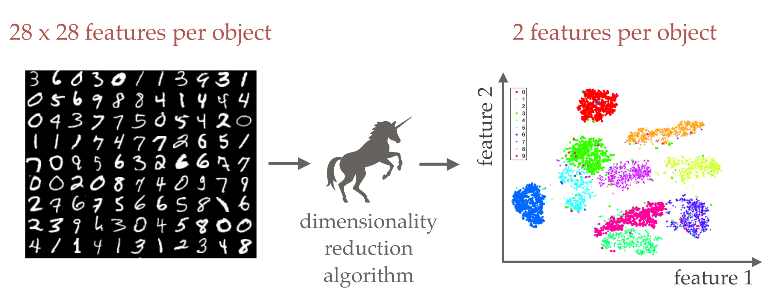

**Science is all about compression**

In physics, we are usually trying to extract simplicity from the observed complex world. Traditionally the stellar sequence is one way astrophysicists found how to compress the data from stars on the 2D plot.

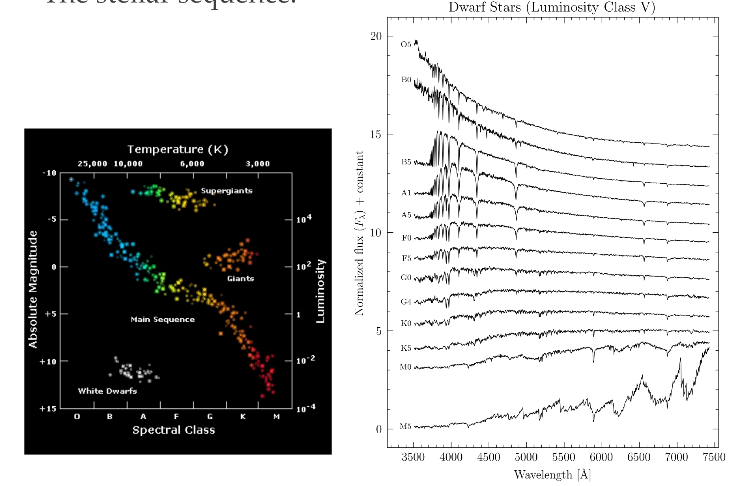

Dimensionality reduction is a powerful technique widely used in various fields, including data analysis, machine learning, and scientific research. It involves the transformation of high-dimensional data into a lower-dimensional representation while preserving essential information.

One significant advantage of dimensionality reduction is its ability to simplify complex datasets, making them more manageable and comprehensible. By reducing the number of variables, the remaining dimensions can better capture the intrinsic structure and patterns within the data, aiding in visualization and interpretation. Additionally, dimensionality reduction can contribute to improving computational efficiency by reducing the storage and processing requirements for large datasets.

Another objective of dimensionality reduction is to alleviate the curse of dimensionality, where datasets with numerous variables suffer from increased computational complexity, reduced interpretability, and the potential for overfitting.

Techniques like principal component analysis (PCA) have been employed to identify the most significant variables and reduce the data to its essential components, aiding in particle identification, event classification, and anomaly detection.

**Apart from neural networks the main Python library to use for machine learning is [scikit-learn](https://scikit-learn.org/stable/index.html)**

# Principle component analysis



PCA is the algorithm that searches for the representation of the data in the new coordinate space, by finding the axis of the biggest variability of the data.


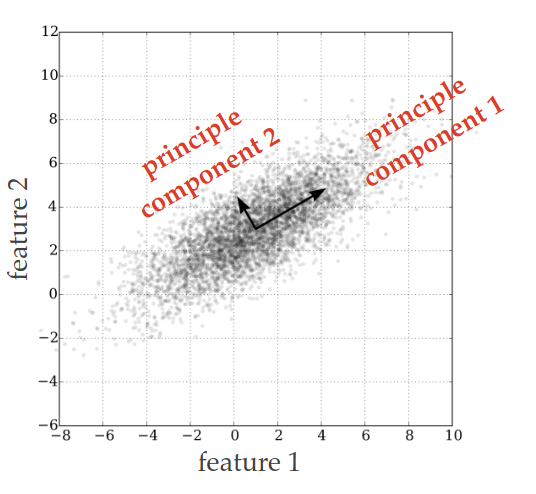

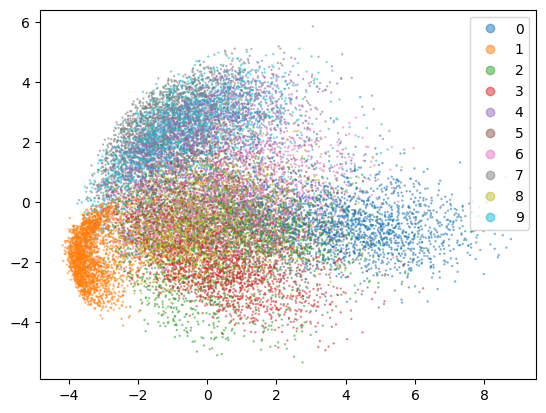

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
latent_layer = pca.fit_transform(mnist_train_x)
scatter = plt.scatter (latent_layer[:,0], latent_layer[:,1], s=0.5, alpha=0.5, c=np.argmax(mnist_train_y, axis=-1), cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))

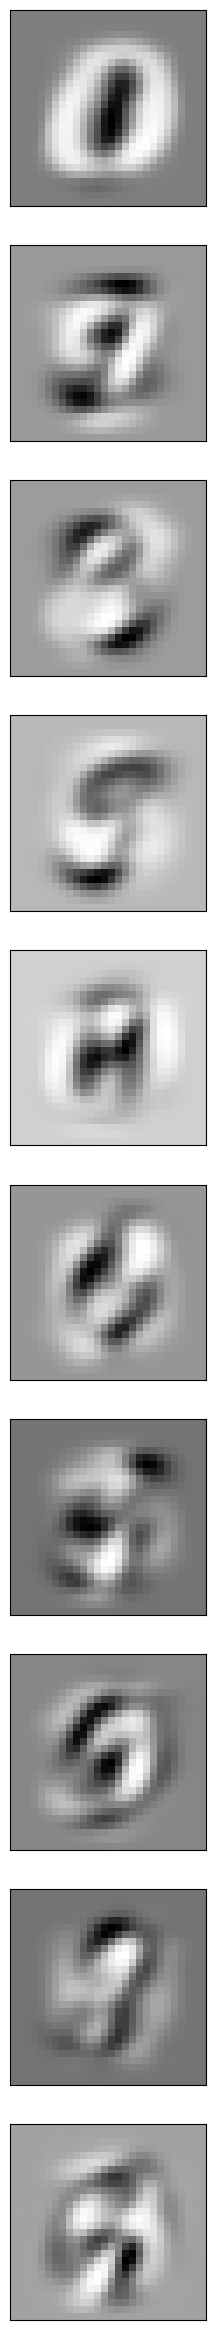

In [72]:
pca = PCA(n_components=10)
latent_layer = pca.fit_transform(mnist_train_x)
centers = pca.components_
fig, ax = plt.subplots(centers.shape[0], sharey=True, sharex=True, figsize=(3, centers.shape[0]*3))
for i in range(centers.shape[0]):
    center = centers[i].reshape([int(np.sqrt(mnist_train_x.shape[-1])), -1])
    ax[i].imshow(center, cmap='Greys_r')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

Text(0, 0.5, 'variance')

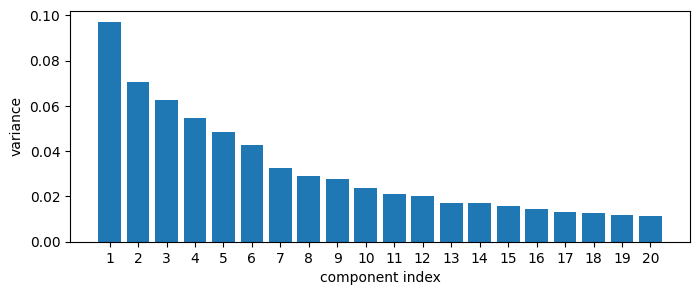

In [66]:
pca = PCA(n_components=20)
latent_layer = pca.fit_transform(mnist_train_x)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(1, figsize=(8, 3))
plt.bar(np.arange(len(explained_variance_ratio)) + 1, explained_variance_ratio)
plt.xticks(np.arange(len(explained_variance_ratio))+ 1)
plt.xlabel("component index")
plt.ylabel("variance")

# Non-negative matrix factorization



NMF is simmilar to the PCA algorithm in idea, however it adds additional constraint that the latent representation must be non-negative.

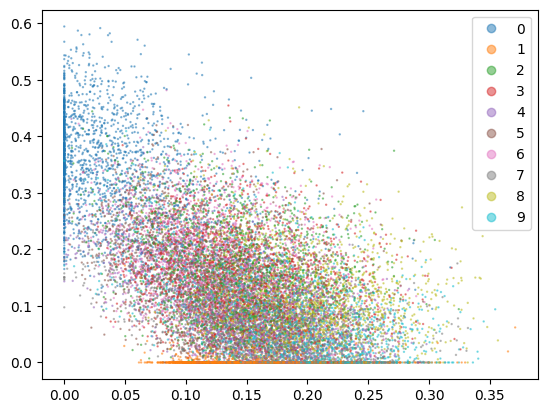

In [73]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2)
latent_layer = nmf.fit_transform(mnist_train_x)
scatter = plt.scatter (latent_layer[:,0], latent_layer[:,1], s=0.5, alpha=0.5, c=np.argmax(mnist_train_y, axis=-1), cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))

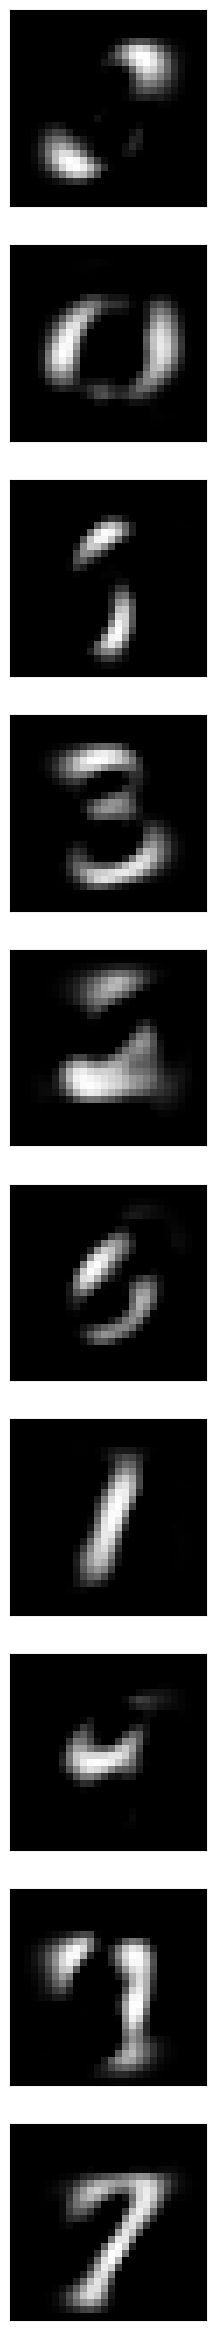

In [76]:
nmf = NMF(n_components=10)
latent_layer = nmf.fit_transform(mnist_train_x)
centers = nmf.components_
fig, ax = plt.subplots(centers.shape[0], sharey=True, sharex=True, figsize=(3, centers.shape[0]*3))
for i in range(centers.shape[0]):
    center = centers[i].reshape([int(np.sqrt(mnist_train_x.shape[-1])), -1])
    ax[i].imshow(center, cmap='Greys_r')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

##Autoencoder
An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation and then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

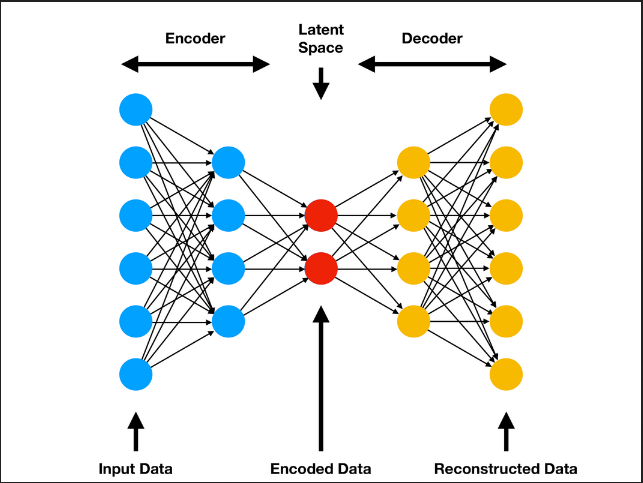

##Example
Create autoencoder to represent MNIST dataset in 2D space. Plot the latent space with the corresponding labels.

In [49]:
encoder_layer = tf.keras.Input (784)
encoder_layer1 = tf.keras.layers.Dense (units=128, activation="sigmoid") (encoder_layer)
encoder_layer2 = tf.keras.layers.Dense (units=32, activation="relu") (encoder_layer1)
encoder_layer3= tf.keras.layers.Dense (units=8, activation="sigmoid") (encoder_layer2)
latent_layer= tf.keras.layers.Dense (units=2, activation="linear", name="latent_layer") (encoder_layer3)
decoder_layer3= tf.keras.layers.Dense (units=8, activation="sigmoid") (latent_layer)
decoder_layer2= tf.keras.layers.Dense (units=32, activation="sigmoid") (decoder_layer3)
decoder_layer1= tf.keras.layers.Dense (units=128, activation="relu") (decoder_layer2)
decoder_layer= tf.keras.layers.Dense (units=784, activation="sigmoid") (decoder_layer1)
model = tf.keras.Model (inputs=encoder_layer, outputs=decoder_layer)

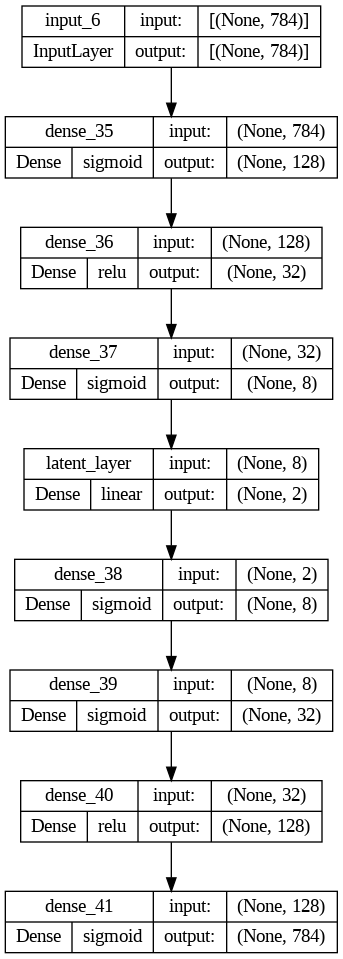

In [50]:
tf.keras.utils.plot_model(model,  show_shapes=True, show_layer_activations=True)

In [51]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), "mse")

In [ ]:
model.fit(x=mnist_train_x, y=mnist_train_x, epochs=200, batch_size=1024)

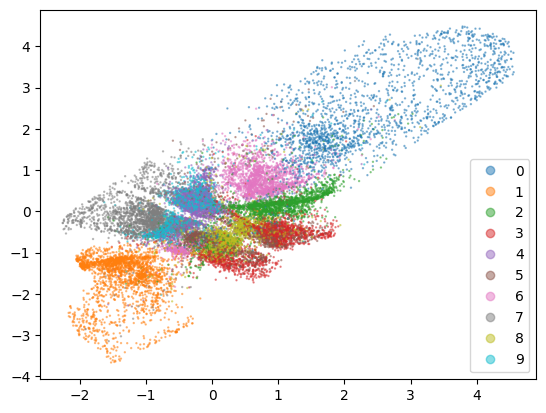

In [53]:
import matplotlib.pyplot as plt
encoder = tf.keras.Model(inputs=model.inputs, outputs=model.get_layer("latent_layer").output)
latent_layer = encoder(mnist_train_x)
scatter = plt.scatter (latent_layer[:,0], latent_layer[:,1], s=0.5, alpha=0.5, c=np.argmax(mnist_train_y, axis=-1), cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))

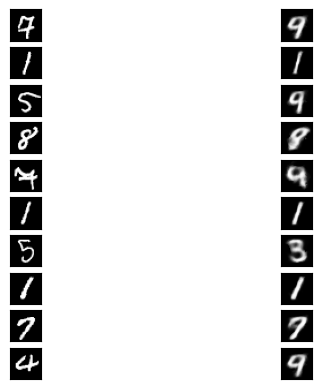

In [54]:
predictions = np.array(model(mnist_train_x))
indexes = np.random.randint(mnist_train_x.shape[0], size=10)
fig, ax = plt.subplots(len(indexes),2)
for i in range(len(indexes)):
    test = mnist_train_x[indexes[i]].reshape([int(np.sqrt(mnist_train_x.shape[-1])), -1])
    ax[i,0].imshow(test, cmap='Greys_r')
    ax[i,0].set_xticks([])
    ax[i,0].set_yticks([])
    predicit = predictions[indexes[i]].reshape([int(np.sqrt(mnist_train_x.shape[-1])), -1])
    ax[i,1].imshow(predicit, cmap='Greys_r')
    ax[i,1].set_xticks([])
    ax[i,1].set_yticks([])


One usage of autoencoder can be seen [here](https://www.researchgate.net/publication/357226649_Automated_Classification_of_LSST_Images_Using_Convolutional_Neural_Networks).

#Clustering

Clustering is the task of grouping objects in the sample, such that objects in the same group are more “similar” to each other than to objects in other groups.

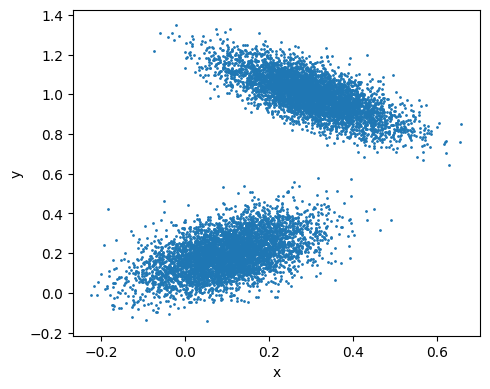

In [ ]:
size = 5000
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T

mean_2 = np.array([0.3, 1.0])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

plt.figure(1, figsize=(5, 4))
plt.scatter(x, y, s=1)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()


There is a large number of clustering algorithms, each having itsadvantages and disadvantages.

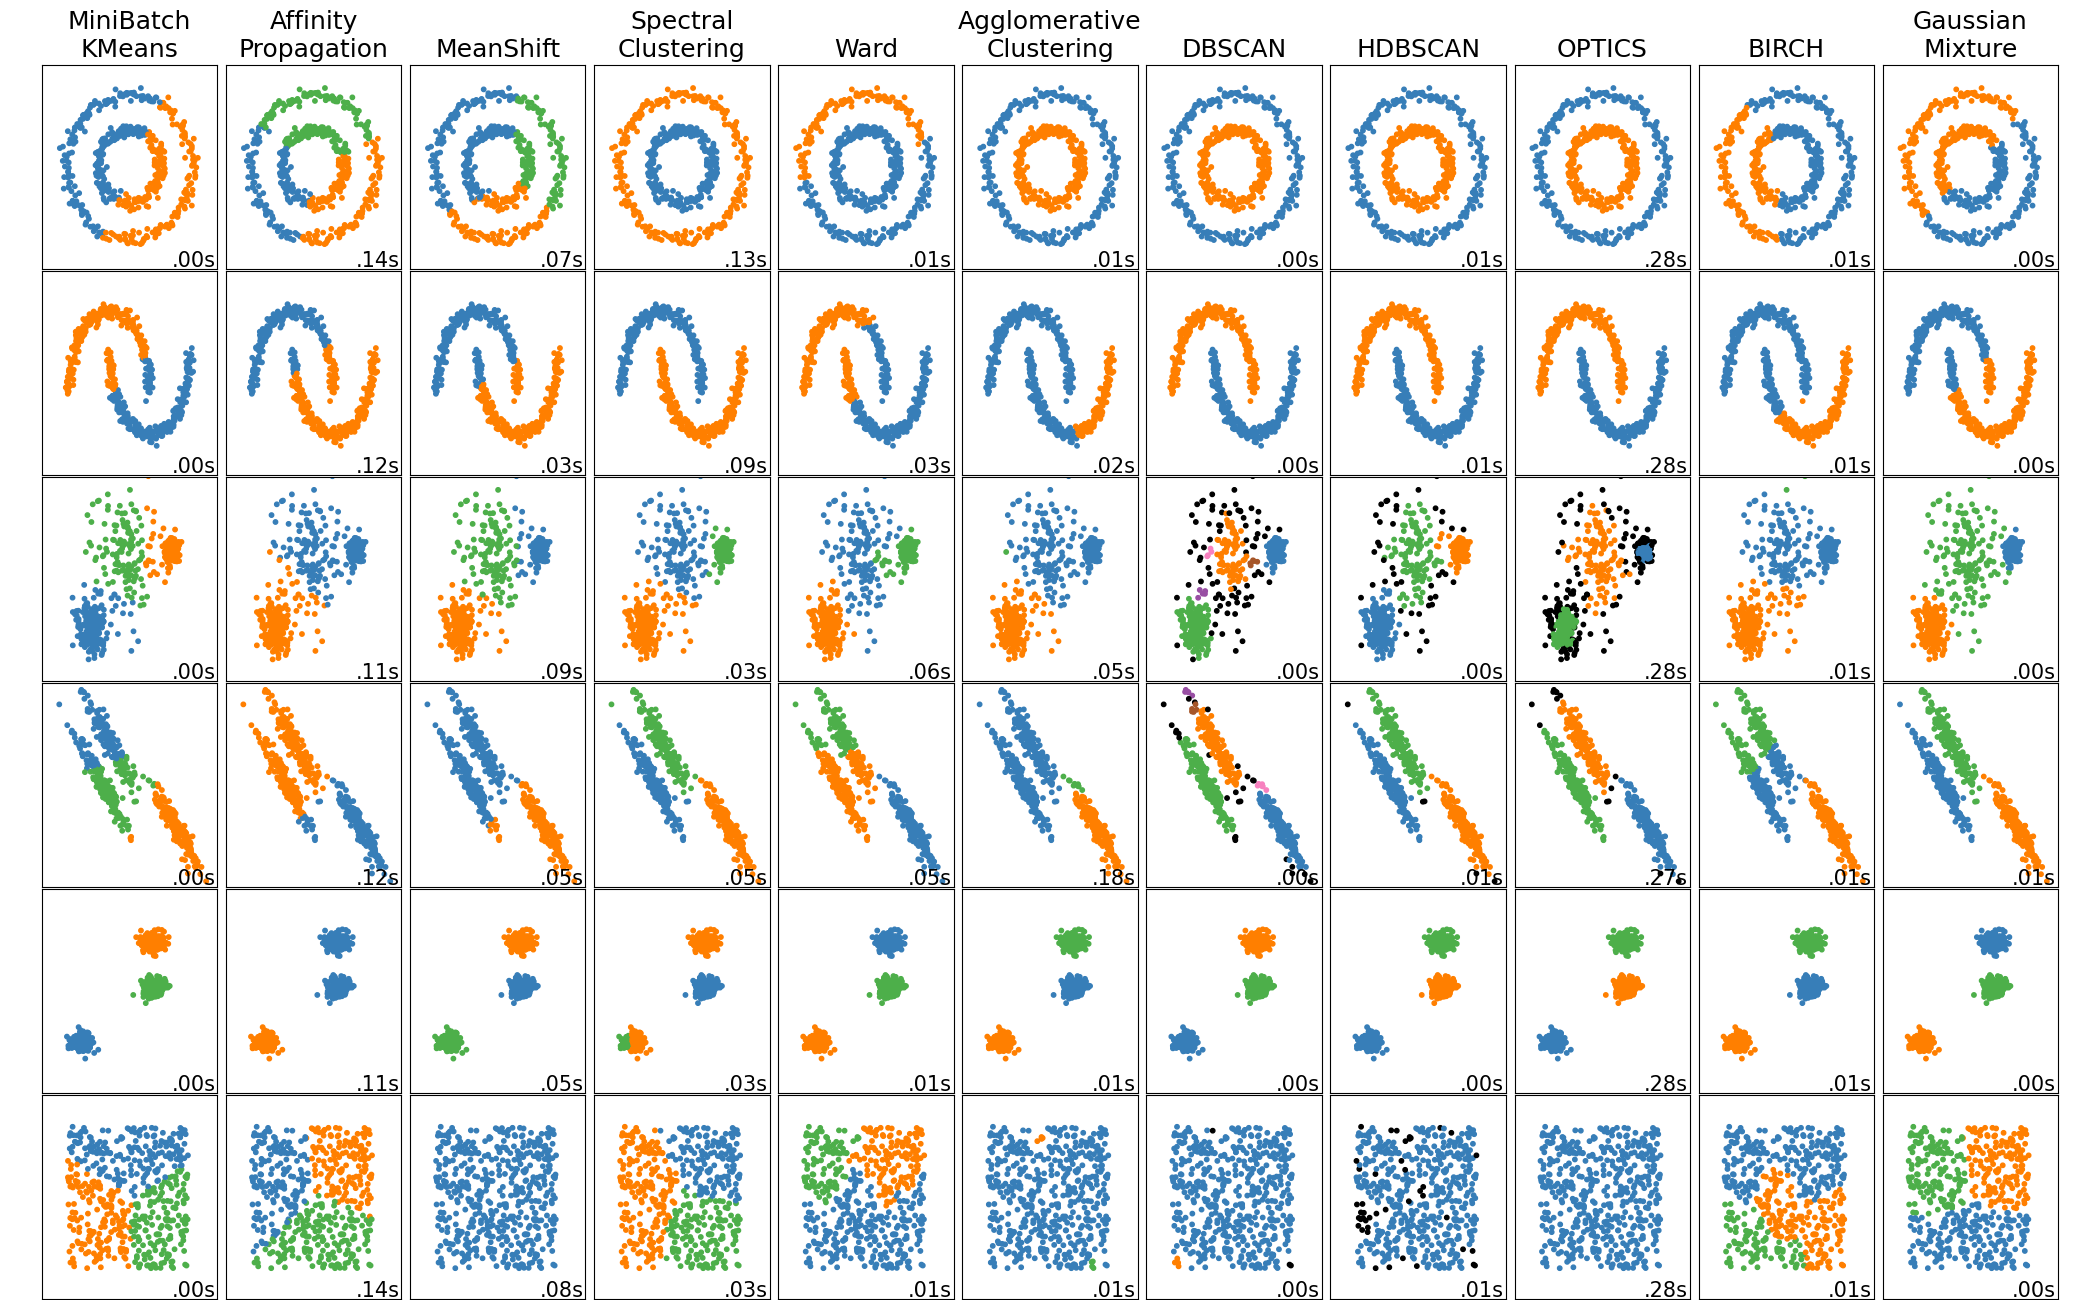

The easiest clustering algorithm is called KMeans. Explanation of the algorithm can be found [here](https://youtu.be/QXOkPvFM6NU?t=219).



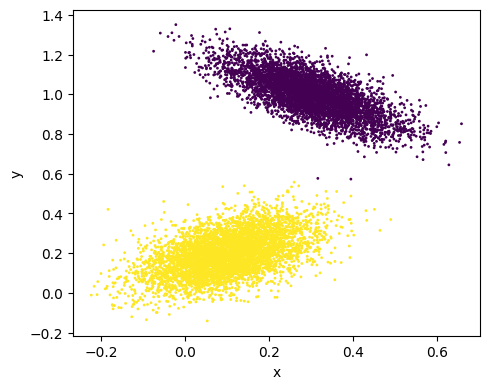

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=0)
kmeans.fit(np.array([x, y]).T)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(1, figsize=(5, 4))
plt.scatter(x, y, s=1, c=labels)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()

#Case study 1

A company is getting a lot of emails and would like to sort them with appropriate labels. This is very similar to the problem of the [Sentiment analysis problem](https://en.wikipedia.org/wiki/Sentiment_analysis). However, this company has some amount of mail already labelled by the staff. After closer inspection, it is evident that most of the labels are wrong or missing. How would you approach solving the problem?

## Possible solution

Autoencoder + clustering of the latent representation

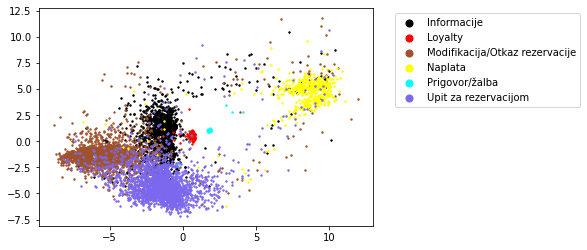

#Case study 2
Scientists are investigating air pollution in some areas. After collecting the data for a large number of days on the concentration of the multiple number of elements in the aerosol particles in that area, the question is how to find the main sources of pollution in that area.

That publication can be found [here](https://www.researchgate.net/profile/Marija-Cargonja/publication/332500288_Characteristics_of_aerosol_pollution_in_the_vicinity_of_an_oil_refinery_near_Rijeka_Croatia/links/5f51e716458515e96d2b5008/Characteristics-of-aerosol-pollution-in-the-vicinity-of-an-oil-refinery-near-Rijeka-Croatia.pdf).

In [86]:
#To download the file with the mesurements
!curl -o "/content/koncentracije - Urinj.csv" "https://raw.githubusercontent.com/kmrakovcic/FoP_ML_workshop23/master/koncentracije%20-%20Urinj.csv"


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

urinj_train_df = pd.read_csv("/content/koncentracije - Urinj.csv")
urinj_train_df

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  101k  100  101k    0     0   693k      0 --:--:-- --:--:-- --:--:--  698k


,Date,ID,Na,Mg,Al,Si,S,K,Ca,Ti,...,Cr,Mn,Fe,Ni,Cu,Zn,Br,Pb,BC,PM 2.5
0,14/2/2017/,30k,0.024956,0.009876,0.033226,0.082250,1.544481,0.162333,0.064314,0.002830,...,0.001756,0.001845,0.097137,0.000650,0.002924,0.008788,0.003156,0.008522,2.083235,16.833668
1,16/2/2017/,31k,0.048279,0.010252,0.037396,0.107494,1.363653,0.242136,0.103354,0.002535,...,0.001906,0.005952,0.108572,0.013028,0.004113,0.022432,0.004503,0.016424,3.028107,15.618643
2,18/2/2017/,32k,0.018186,0.003654,0.009939,0.021991,0.232215,0.067060,0.015880,0.000646,...,0.001940,0.002683,0.023436,0.001324,0.002446,0.005470,0.002120,0.005629,1.737906,4.152807
3,20/2/2017/,33k,0.019543,0.004561,0.035749,0.063816,0.759494,0.155105,0.042186,0.001614,...,0.001897,0.002865,0.070042,0.004851,0.002583,0.013816,0.001897,0.005004,2.452251,13.296148
4,22/2/2017/,34k,0.049890,0.005612,0.017446,0.045439,0.682100,0.233623,0.043877,0.001825,...,0.002549,0.006146,0.075708,0.004152,0.004131,0.021696,0.003847,0.009295,3.374306,19.676479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,30/5/2019/,310 k,0.029615,0.009591,0.014606,0.038283,0.214089,0.020196,0.048769,0.000633,...,0.000297,0.000968,0.024616,0.001023,0.000868,0.002546,0.000831,0.001076,1.682150,4.191028
274,1/6/2019/,311 k,0.049287,0.018516,0.035407,0.090816,0.383063,0.042404,0.122652,0.002530,...,0.000570,0.001993,0.062113,0.000862,0.001941,0.005979,0.001061,0.001144,2.639021,7.745936
275,3/6/2019/,312 k,0.057727,0.018420,0.043078,0.098320,1.103740,0.037701,0.131602,0.002192,...,0.000812,0.002196,0.095122,0.006977,0.002159,0.008500,0.000992,0.002096,3.145656,15.430423
276,5/6/2019/,313 k,0.157907,0.029785,0.044874,0.108118,1.287016,0.035646,0.084148,0.002181,...,0.000000,0.002150,0.075178,0.004174,0.002653,0.007267,0.001975,0.001506,3.079216,15.519647


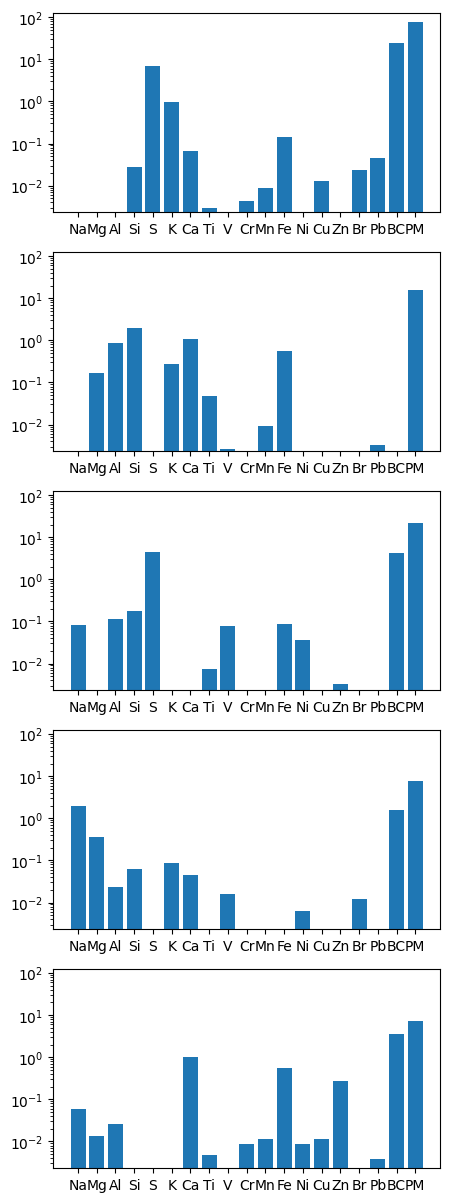

In [84]:
# @title Solution
from sklearn.decomposition import NMF
x_train = urinj_train_df[['Na', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Zn', 'Br', 'Pb', 'BC', "PM 2.5"]].to_numpy()
maxes = x_train.max(axis=0)[np.newaxis, :]
x_train = x_train / maxes
nmf = NMF(n_components=5)
latent = nmf.fit_transform(x_train)

centers = nmf.components_*maxes
fig, ax = plt.subplots(centers.shape[0], sharey=True, figsize =(5, 15))
for i in range(centers.shape[0]):
    ax[i].set_yscale('log')
    ax[i].bar(['Na', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Zn', 'Br', 'Pb', 'BC', "PM"],centers[i,:])
plt.show()